# Dynamics of Coupled Kuramoto oscillators: on Network

Following the spirit of previous code on random walker, here instead of walkers moving from node to node, each node will have an oscillator with a phase (theta) and frequency (omega), and these will be updated over time based on the states of neighboring nodes.
The changes include replacing the walker distribution W with the phase theta and frequency omega of the oscillators and replacing the random walk process with the Kuramoto oscillator update rule.

For more information about the Kuramoto model, see the [Wikipedia article](https://en.wikipedia.org/wiki/Kuramoto_model).


In this code: 

- Each node in the graph represents a Kuramoto oscillator, and the state of each oscillator is defined by two attributes: its phase (theta), which is a value in [0, 2pi], and its frequency (omega), which is a small random value around 1.

- The kuramoto_simulation function performs the simulation of the Kuramoto model. At each time step, for each oscillator, it computes the next phase based on its current phase, frequency, and the phases of the neighboring oscillators. This process is repeated for stop time steps.

- Finally, the script visualizes the final states of the oscillators in the graph. The color of each node represents the sine of the phase of its oscillator, visualized using the HSV color map. The color bar shows the mapping from color to the sine of the phase.


In [1]:
import numpy as np
import networkx as nx
from numpy import sin, pi
from numpy.random import uniform, random
import matplotlib.pyplot as plt
from matplotlib import cm, colors


In [16]:
def kuramoto_simulation(G, stop, alpha=2, Dt=0.01):
    """
    Simulate coupled Kuramoto oscillators on a graph.
    
    Parameters:
    G (networkx Graph object): The graph on which the simulation is performed.
    stop (int): The number of time steps to run the simulation.
    alpha (float): The coupling strength.
    Dt (float): The time step for updates.
    
    Returns:
    list of networkx Graph object: List of graphs representing the states of the oscillators at different times.
    """
    
    graphs = []
    
    for i in G.nodes:
        G.nodes[i]['theta'] = 2 * pi * random()
        G.nodes[i]['omega'] = 1. + uniform(-0.05, 0.05)

    for t in range(stop):
        nextg = G.copy()
        for i in G.nodes:
            theta_i = G.nodes[i]['theta']
            nextg.nodes[i]['theta'] = theta_i + (G.nodes[i]['omega'] + alpha * 
                (sum(sin(G.nodes[j]['theta'] - theta_i) for j in G.neighbors(i)) / 
                 G.degree(i))) * Dt
        G = nextg
        if t in [0, stop//2, stop-1]:  # Store graphs at the beginning, middle, and end
            graphs.append(G.copy())

    return graphs


Kuramoto models, like the one we simulated above, are frequently used to explore these phenomena. In these models, we can investigate how a group of oscillators with slightly different natural frequencies can synchronize under the influence of a weak coupling.

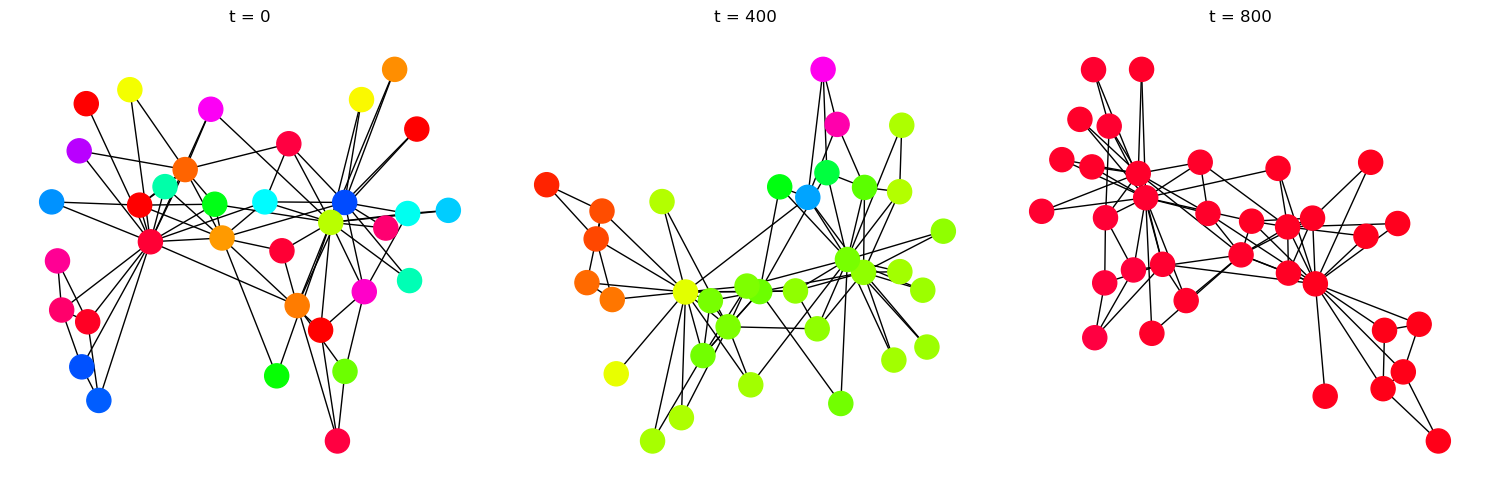

In [18]:
# Load the Karate Club graph
G = nx.karate_club_graph()

# Run the simulation
stop = 800
graphs = kuramoto_simulation(G, stop)

# Visualize the states of the oscillators at the beginning, middle, and end of the simulation
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, graph in enumerate(graphs):
    node_colors = [sin(graph.nodes[i]['theta']) for i in graph.nodes]
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos=pos, node_color=node_colors, cmap=plt.cm.hsv, vmin=-1, vmax=1, ax=axs[i])
    axs[i].set_title(f't = {i*stop//2}')

plt.tight_layout()
plt.show()


At the beginning (t=0), the phases are randomly assigned, so the colors are spread throughout the spectrum. Over time, as the oscillators influence each other, they start to synchronize. By the end of the simulation, if synchronization occurs, the nodes should have similar colors, reflecting similar phases.

**Note**: It's important to remember that whether or not the oscillators will synchronize depends on various factors including the topology of the network, the coupling strength (alpha), the inherent frequencies of the oscillators, and the number of time steps the simulation is run (stop). 
Try adjusting these parameters, and have fun !! 